In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, Math, Latex

# Daltonisme bayésien

Environ 8% des hommes et 0.5% des femmes sont, à des degrés divers, daltoniens.

## Question 1

Calculer le pourcentage de femmes parmi les daltoniens (en ajoutant une hypothèse a priori que vous préciserez)

In [2]:
G = gum.LabelizedVariable('G','Gender',["M","F"])
C = gum.LabelizedVariable('C','Colorblindness',["Y","N"])

On fait l'hypothèse qu'il y a un peu moins d'hommes que de femmes sur Terre.

In [5]:
display(Math(r"$P(G)$"))
pG = gum.Potential().add(G).fillWith([0.48,0.52])
gnb.showPotential(pG)

<IPython.core.display.Math object>

In [4]:
display(Math(r"$P(C|G)$"))
pCsG = gum.Potential().add(C).add(G).fillWith([0.08,0.92,0.005,0.995])
gnb.showPotential(pCsG)

<IPython.core.display.Math object>

In [5]:
pCG = pCsG*pG
display(Math(r"$P(C,G)$"))
gnb.showPotential(pCG)

<IPython.core.display.Math object>

In [6]:
pC = pCG.margSumOut(['G'])
display(Math(r"$P(C)$"))
gnb.showPotential(pC)

<IPython.core.display.Math object>

In [7]:
pGsC = pCG/pC
display(Math(r"$P(G|C)$"))
gnb.showPotential(pGsC)

<IPython.core.display.Math object>

In [8]:
print("Il y a", round(pGsC[{"C":"Y","G":"F"}]*100,2), "% de femmes parmi les daltoniens.")

Il y a 6.34 % de femmes parmi les daltoniens.


## Question 2

Construire le réseau bayésien qui représente ce problème et vérifier cette valeur par propagation.

In [6]:
bn=gum.BayesNet('BayesianColorblindness')

In [7]:
G=bn.add(gum.LabelizedVariable('G','Gender',["M","F"]))

In [8]:
C=bn.add(gum.LabelizedVariable('C','Colorblindness',["Y","N"]))

In [9]:
bn.addArc(G,C)

In [10]:
bn

(gum::BayesNet<double>@0x5648ad482370) BN{nodes: 2, arcs: 1, domainSize: 4, dim: 6}

In [11]:
bn.cpt(G).fillWith([0.48,0.52])

(gum::Potential<double>@0x5648ac7b7420) <G:M> :: 0.48 /<G:F> :: 0.52

In [12]:
bn.cpt(C)[{'G':0}]=[0.08,0.92]
bn.cpt(C)[{'G':1}]=[0.005,0.995]
bn.cpt(C)

(gum::Potential<double>@0x5648acaf6620) <C:Y|G:M> :: 0.08 /<C:N|G:M> :: 0.92 /<C:Y|G:F> :: 0.005 /<C:N|G:F> :: 0.995

In [13]:
gum.saveBN(bn,"BayesianColorblindness.bif")

In [14]:
with open("BayesianColorblindness.bif","r") as out:
    print(out.read())

network "BayesianColorblindness" {
// written by aGrUM 0.16.4
}

variable G {
   type discrete[2] {M, F};
}

variable C {
   type discrete[2] {Y, N};
}

probability (G) {
   default 0.48 0.52;
}
probability (C | G) {
   (M) 0.08 0.92;
   (F) 0.005 0.995;
}




In [15]:
ie=gum.LazyPropagation(bn)
ie.setEvidence({'C':"Y"})
ie.makeInference()
ie.posterior(G)

(gum::Potential<double>@0x5648acc25ea0) <G:M> :: 0.936585 /<G:F> :: 0.0634146

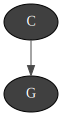

In [16]:
bn.reverseArc(G,C)
gnb.showBN(bn)

In [17]:
gnb.showPotential(bn.cpt(G))